In [2]:
import numpy as np
import matplotlib.pyplot as plt


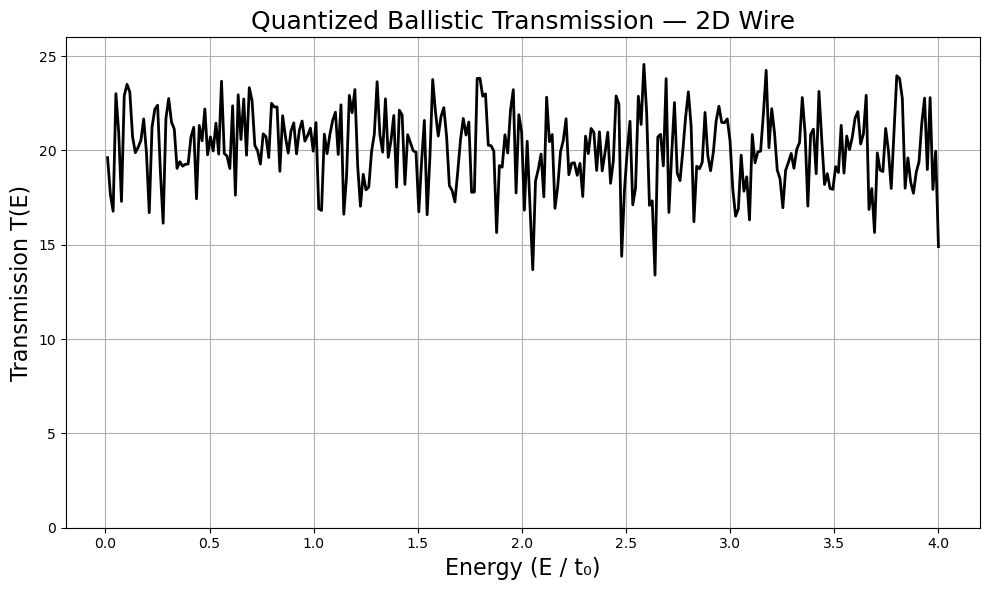

In [15]:
# Parameters
Modes=25
t=1.0
eta=1e-6j

# Hamiltonian
alpha=4*t*np.ones(Modes,dtype=complex)
alpha=np.diag(alpha)

for i in range(Modes-1):
    alpha[i,i+1]=alpha[i+1,i]=-t
beta=-t*np.ones(Modes,dtype=complex)
beta=np.diag(beta)

# Surface Greens functions

def surface_greens_function(alpha,beta,energy,eta):
    g=np.linalg.inv((energy+eta)*np.eye(Modes)-alpha)
    for i in range(200):
        g1=np.linalg.inv((energy+eta)*np.eye(Modes)-alpha-beta.conj().T@g@beta)
        if np.linalg.norm(g1-g)/np.linalg.norm(g+g1)<1e-6:
            break
        g=g+g1
    return g

def transmission(alpha,beta,E,eta):
    gl=gr=surface_greens_function(alpha,beta,E,eta)

    sigma_l=beta.conj().T @gl @ beta
    sigma_r=beta.conj().T@gr@beta

    gamma_l=1j*(sigma_l-sigma_l.conj().T)
    gamma_r=1j*(sigma_r-sigma_r.conj().T)

    G=np.linalg.inv((E+eta)*np.eye(Modes)-alpha-sigma_l-sigma_r)
    Gdag=G.conj().T
    Trans=np.real(np.trace(gamma_l@G@gamma_r@Gdag))
    return Trans

T_vals=[]
energies=np.linspace(0.01,4,300)*t

for E in energies:
    trans=transmission(alpha,beta,E,eta)
    T_vals.append(trans)


plt.figure(figsize=(10, 6))
plt.plot(energies / t, T_vals, 'k-', linewidth=2)
plt.xlabel("Energy (E / t₀)", fontsize=16)
plt.ylabel("Transmission T(E)", fontsize=16)
plt.title("Quantized Ballistic Transmission — 2D Wire", fontsize=18)
plt.grid(True)
plt.ylim(0, Modes + 1)
plt.tight_layout()
plt.show()


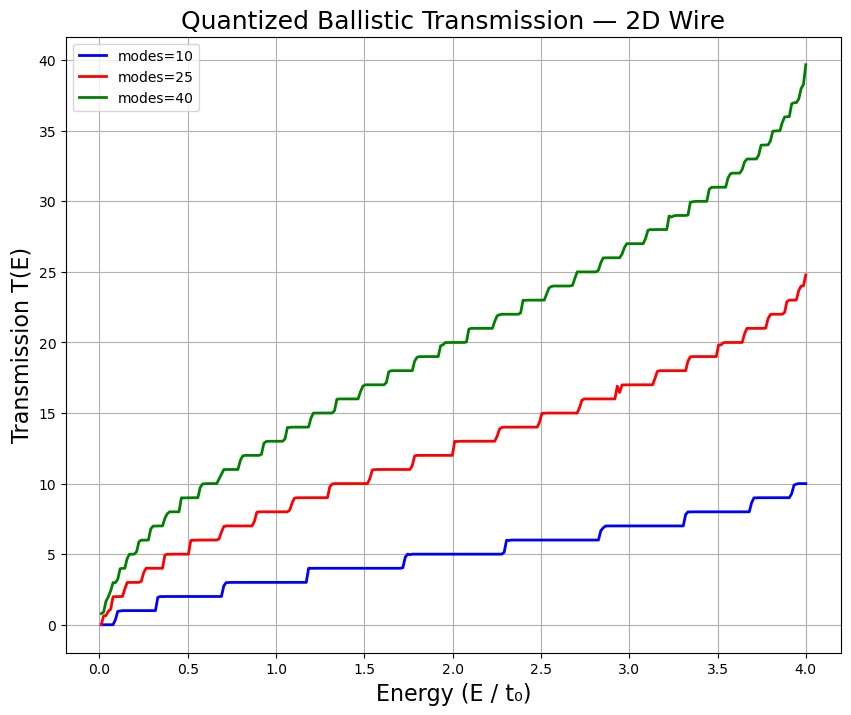

In [38]:
# Parameters

# Hamiltonian
alpha=4*t*np.ones(Modes,dtype=complex)
alpha=np.diag(alpha)

for i in range(Modes-1):
    alpha[i,i+1]=alpha[i+1,i]=-t
beta=-t*np.ones(Modes,dtype=complex)
beta=np.diag(beta)

# Surface Greens functions

def surface_greens_function(alpha,beta,energy,eta):
    g=np.linalg.inv((energy+eta)*np.eye(Modes)-alpha)
    for i in range(200):
        g1=np.linalg.inv((energy+eta)*np.eye(Modes)-alpha-beta.conj().T@g@beta)
        if np.linalg.norm(g1-g)/np.linalg.norm(g+g1)<1e-6:
            break
        g=0.5*(g+g1)
    return g

def transmission(alpha,beta,E,eta):
    gl=gr=surface_greens_function(alpha,beta,E,eta)

    sigma_l=beta.conj().T @gl @ beta
    sigma_r=beta.conj().T@gr@beta

    gamma_l=1j*(sigma_l-sigma_l.conj().T)
    gamma_r=1j*(sigma_r-sigma_r.conj().T)

    G=np.linalg.inv((E+eta)*np.eye(Modes)-alpha-sigma_l-sigma_r)
    Gdag=G.conj().T
    Trans=np.real(np.trace(gamma_l@G@gamma_r@Gdag))
    return Trans

T_vals1=[]
energies=np.linspace(0.01,4,300)*t

for E in energies:
    trans=transmission(alpha,beta,E,eta)
    T_vals1.append(trans)


fig,ax=plt.subplots(1,1,figsize=(10,8))
for modes, color in zip([10, 25, 40], ['b', 'r', 'g']):
    Modes = modes
    # Rebuild Hamiltonian for each Modes
    alpha = 4 * t * np.ones(Modes, dtype=complex)
    alpha = np.diag(alpha)
    for i in range(Modes - 1):
        alpha[i, i + 1] = alpha[i + 1, i] = -t
    beta = -t * np.ones(Modes, dtype=complex)
    beta = np.diag(beta)
    # Recompute transmission
    T_vals1 = []
    for E in energies:
        T_vals1.append(transmission(alpha, beta, E, eta))
    ax.plot(energies / t, T_vals1, color+'-', linewidth=2, label=f'modes={Modes}')

ax.set_xlabel("Energy (E / t₀)", fontsize=16)
ax.set_ylabel("Transmission T(E)", fontsize=16)
ax.set_title("Quantized Ballistic Transmission — 2D Wire", fontsize=18)
ax.legend()
ax.grid(True)

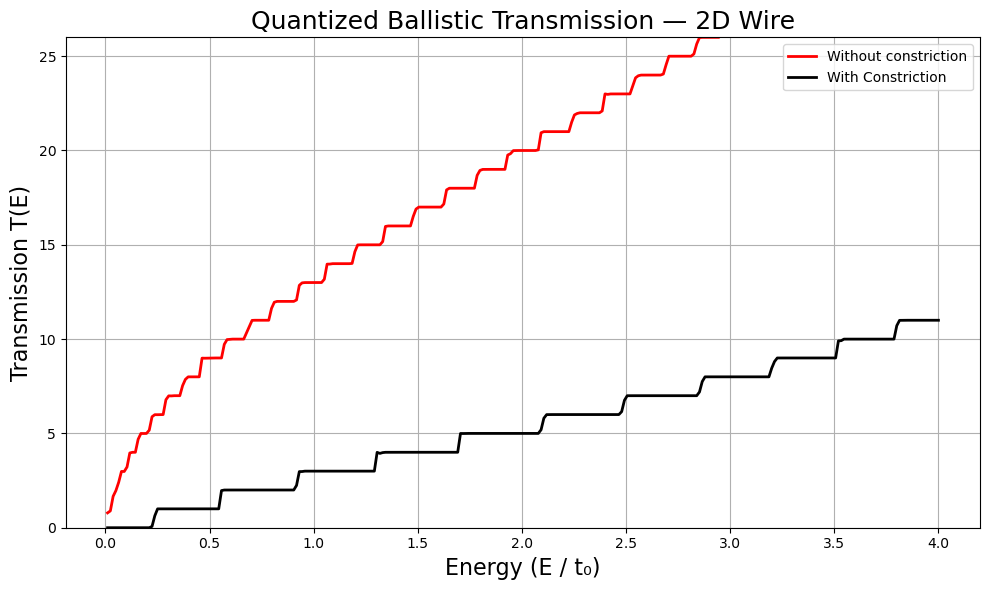

In [42]:
#parameters
U0=10
w=10

Modes=25
t=1.0
eta=1e-6j

# Hamiltonian
alpha=4*t*np.ones(Modes,dtype=complex)
alpha=np.diag(alpha)

for i in range(Modes-1):
    alpha[i,i+1]=alpha[i+1,i]=-t
beta=-t*np.ones(Modes,dtype=complex)
beta=np.diag(beta)

potential=np.array([U0*np.exp(-((y-Modes)/w)**2) for y in range(Modes)])
alpha+=np.diag(potential)
# Surface Greens functions

def surface_greens_function(alpha,beta,energy,eta):
    g=np.linalg.inv((energy+eta)*np.eye(Modes)-alpha)
    for i in range(200):
        g1=np.linalg.inv((energy+eta)*np.eye(Modes)-alpha-beta.conj().T@g@beta)
        if np.linalg.norm(g1-g)/np.linalg.norm(g+g1)<1e-6:
            break
        g=0.5*(g+g1)
    return g

def transmission(alpha,beta,E,eta):
    gl=gr=surface_greens_function(alpha,beta,E,eta)

    sigma_l=beta.conj().T @gl @ beta
    sigma_r=beta.conj().T@gr@beta

    gamma_l=1j*(sigma_l-sigma_l.conj().T)
    gamma_r=1j*(sigma_r-sigma_r.conj().T)

    G=np.linalg.inv((E+eta)*np.eye(Modes)-alpha-sigma_l-sigma_r)
    Gdag=G.conj().T
    Trans=np.real(np.trace(gamma_l@G@gamma_r@Gdag))
    return Trans

T_vals2=[]
energies=np.linspace(0.01,4,300)*t

for E in energies:
    trans=transmission(alpha,beta,E,eta)
    T_vals2.append(trans)


# Plot
plt.figure(figsize=(10, 6))
plt.plot(energies/t, T_vals1, 'r-', lw='2',label='Without constriction')
plt.plot(energies / t, T_vals2, 'k-', linewidth=2, label='With Constriction')
plt.xlabel("Energy (E / t₀)", fontsize=16)
plt.ylabel("Transmission T(E)", fontsize=16)
plt.title("Quantized Ballistic Transmission — 2D Wire", fontsize=18)
plt.grid(True)
plt.ylim(0, Modes + 1)
plt.legend()
plt.tight_layout()
plt.show()


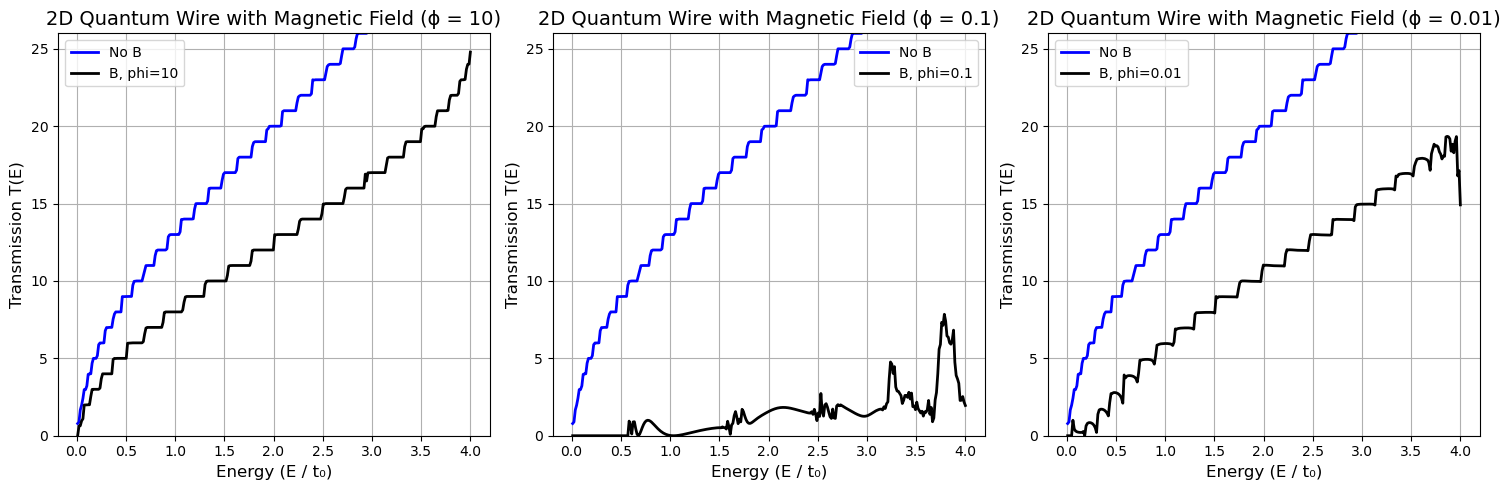

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Modes = 25              # Width of the wire
t = 1.0
eta = 1e-6j
              # Magnetic field Peierls phase: phi = B a² / Φ₀

# Hamiltonian: Onsite (alpha)
alpha = 4 * t * np.ones(Modes, dtype=complex)
alpha = np.diag(alpha)
for i in range(Modes - 1):
    alpha[i, i + 1] = alpha[i + 1, i] = -t

# Hopping (beta) with magnetic field in x-direction
beta = np.zeros((Modes, Modes), dtype=complex)
for j in range(Modes):
    beta[j, j] = -t * np.exp(1j * 2 * np.pi * phi * j)

# Surface Green's function
def surface_greens_function(alpha, beta, energy, eta):
    g = np.linalg.inv((energy + eta) * np.eye(Modes) - alpha)
    for _ in range(200):
        g1 = np.linalg.inv((energy + eta) * np.eye(Modes) - alpha - beta.conj().T @ g @ beta)
        if np.linalg.norm(g1 - g) / np.linalg.norm(g + g1) < 1e-6:
            break
        g = 0.5 * (g + g1)
    return g

# Transmission calculation
def transmission(alpha, beta, E, eta):
    gl = gr = surface_greens_function(alpha, beta, E, eta)
    sigma_l = beta.conj().T @ gl @ beta
    sigma_r = beta @ gr @ beta.conj().T
    gamma_l = 1j * (sigma_l - sigma_l.conj().T)
    gamma_r = 1j * (sigma_r - sigma_r.conj().T)
    G = np.linalg.inv((E + eta) * np.eye(Modes) - alpha - sigma_l - sigma_r)
    Gdag = G.conj().T
    Trans = np.real(np.trace(gamma_l @ G @ gamma_r @ Gdag))
    return Trans

# Loop over energy
T_vals3 = []
energies = np.linspace(0.01, 4, 300) * t
for E in energies:
    T_vals3.append(transmission(alpha, beta, E, eta))

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

phis = [10, 0.1, 0.01]
for i, phi in enumerate(phis):
    # Rebuild Hamiltonian for each phi
    Modes = 25
    alpha = 4 * t * np.ones(Modes, dtype=complex)
    alpha = np.diag(alpha)
    for j in range(Modes - 1):
        alpha[j, j + 1] = alpha[j + 1, j] = -t
    # Hopping (beta) with magnetic field in x-direction
    beta = np.zeros((Modes, Modes), dtype=complex)
    for j in range(Modes):
        beta[j, j] = -t * np.exp(1j * 2 * np.pi * phi * j)
    # Recompute transmission for this phi
    T_vals3 = []
    for E in energies:
        T_vals3.append(transmission(alpha, beta, E, eta))
    axes[i].plot(energies / t, T_vals1, 'b-', lw=2, label='No B')
    axes[i].plot(energies / t, T_vals3, 'k-', linewidth=2, label=f'B, phi={phi}')
    axes[i].set_xlabel("Energy (E / t₀)", fontsize=12)
    axes[i].set_ylabel("Transmission T(E)", fontsize=12)
    axes[i].set_title(f"2D Quantum Wire with Magnetic Field (ϕ = {phi})", fontsize=14)
    axes[i].grid(True)
    axes[i].set_ylim(0, Modes + 1)
    axes[i].legend()

plt.tight_layout()
plt.show()